***
# Model Deployment : Detecting and Analyzing Machine Learning Model Drift Using Open-Source Monitoring Tools

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *October 15, 2025*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Splitting](#1.4.1)
        * [1.4.2 Outlier and Distributional Shape Analysis](#1.4.4)
        * [1.4.3 Collinearity](#1.4.5)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Premodelling Data Preparation](#1.6)
        * [1.6.1 Preprocessed Data Description](#1.6.1)
        * [1.6.2 Preprocessing Pipeline Development](#1.6.2)
    * [1.7 Model Development and Validation](#1.7)
        * [1.7.1 Random Forest](#1.7.1)
        * [1.7.2 AdaBoost](#1.7.2)
        * [1.7.3 Gradient Boosting](#1.7.3)
        * [1.7.4 XGBoost](#1.7.4)
        * [1.7.5 Light GBM](#1.7.5)
        * [1.7.6 CatBoost](#1.7.6)
    * [1.8 Model Monitoring using the NannyML Framework](#1.8)
        * [1.8.1 Baseline Control](#1.8.1)
        * [1.8.2 Simulated Covariate Drift](#1.8.2)
        * [1.8.3 Simulated Prior Shift](#1.8.3)
        * [1.8.4 Simulated Concept Drift](#1.8.4)
        * [1.8.5 Simulated Missingness Spike](#1.8.5)
        * [1.8.6 Simulated Seasonal Pattern](#1.8.6)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project investigates **open-source frameworks for post-deployment model monitoring and performance estimation**, with a particular focus on **NannyML** or detecting and interpreting shifts in machine learning pipelines using <mark style="background-color: #CCECFF"><b>Python</b></mark>. The objective was to systematically analyze how different types of drift and distribution changes manifest after model deployment, and to demonstrate how robust monitoring mitigates risks of performance degradation and biased decision-making. The workflow began with the development and selection of a baseline predictive model, which serves as a reference for stability. The dataset was then deliberately perturbed to simulate a range of realistic post-deployment scenarios: **Covariate Drift** (shifts in feature distributions), **Prior Shift** (changes in target label proportions), **Concept Drift** (evolving relationships between features and outcomes), **Missingness Spikes** (abrupt increases in absent data), and **Seasonal Patterns** (periodic variations in distributions). NannyML’s statistical tests, visualization capabilities, and performance estimation methods were subsequently applied to diagnose these shifts, evaluate their potential impact, and provide interpretable insights into model reliability. By contrasting baseline and perturbed conditions, the experiment demonstrated how continuous monitoring augments traditional offline evaluation, offering a safeguard against hidden risks. The findings highlighted how tools like NannyML can integrate seamlessly into MLOps workflows to enable proactive governance, early warning systems, and sustainable deployment practices. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document.

[Post-Deployment Monitoring](https://www.nannyml.com/) refers to the continuous oversight of machine learning models once they are integrated into production systems. Unlike offline evaluation, which relies on static validation datasets, monitoring addresses the challenges of evolving real-world data streams where underlying distributions may shift. Effective monitoring ensures that models remain accurate, unbiased, and aligned with business objectives. In MLOps, monitoring encompasses data integrity checks, drift detection, performance estimation, and alerting mechanisms. NannyML operationalizes this concept by focusing on performance estimation without ground truth, and by offering statistical methods to detect when data or predictions deviate from expected baselines. The challenges of post-deployment monitoring include delayed or missing ground truth labels, non-stationary data, hidden feedback loops, and difficulties distinguishing natural fluctuations from problematic drifts. Common solutions involve deploying drift detection algorithms, conducting regular audits of data pipelines, simulating counterfactuals, and retraining models on updated data. Monitoring frameworks must balance sensitivity (detecting real problems quickly) with robustness (avoiding false alarms caused by natural noise). Another key challenge is explainability: stakeholders need interpretable signals that justify interventions such as retraining or rolling back models. Tools like NannyML address these challenges through statistical tests for data drift, performance estimation without labels, missingness tracking, and visual diagnostics, making monitoring actionable for data scientists and business teams alike.

[Covariate Shift](https://www.nannyml.com/) occurs when the distribution of input features changes over time compared to the data used to train the model. Also known as data drift, it does not necessarily imply that the model’s predictive mapping is invalid, but it often precedes performance degradation. Detecting covariate drift requires comparing feature distributions between baseline (reference) data and incoming production data. NannyML provides multiple statistical tests and visualization tools to flag significant changes. Key signatures of covariate shift include shifts in summary statistics (mean, variance), changes in distributional shape, or increased divergence between reference and production feature distributions. These shifts may lead to poor generalization, as the model has not been exposed to the altered feature ranges. Detection techniques include univariate statistical tests (e.g., Kolmogorov–Smirnov, Chi-square), multivariate distance measures (e.g., Jensen–Shannon divergence, Population Stability Index), and density estimation methods. Remediation approaches involve domain adaptation, re-weighting training samples, or retraining models on updated data distributions. NannyML implements univariate and multivariate tests, provides drift magnitude quantification, and visualizes feature-level changes, allowing practitioners to pinpoint which features are most responsible for the detected drift.

[Prior Shift](https://www.nannyml.com/) arises when the distribution of the target variable changes, while the conditional relationship between features and labels remains stable. This is also referred to as label shift. Models trained on the original distribution may underperform because their predictions no longer match the new class priors. Detecting prior shifts is crucial, especially in imbalanced classification tasks where small changes in priors can lead to large performance impacts. Prior shift is typically characterized by systematic increases or decreases in class frequencies without corresponding changes in feature distributions. Its impact includes skewed decision thresholds, inflated false positives/negatives, and degraded calibration of predicted probabilities. Detection approaches include monitoring predicted class proportions, estimating priors using EM-based algorithms, and re-weighting predictions to align with new distributions. Correction strategies may involve resampling, threshold adjustment, or cost-sensitive learning. NannyML assists by tracking predicted probability distributions and comparing them against reference priors, using techniques such as KL divergence and PSI to quantify the magnitude of shift.

[Concept Drift](https://www.nannyml.com/) occurs when the underlying relationship between input features and target labels evolves over time. Unlike covariate shift, where features change independently, concept drift implies that the model’s mapping function itself becomes outdated. Concept drift is among the most damaging forms of drift because it directly undermines predictive accuracy. Detecting it often requires monitoring model outputs or inferred performance over time. NannyML addresses this by estimating performance even when ground truth labels are unavailable. Concept drift is typically signaled by a gradual or sudden decline in performance metrics, inconsistent error patterns, or misalignment between expected and actual prediction behavior. Its impact is severe: models may lose predictive power entirely if they cannot adapt. Detection methods include window-based performance monitoring, hypothesis testing, adaptive ensembles, and statistical monitoring of residuals. Corrective actions include periodic retraining, incremental learning, and online adaptation strategies. NannyML leverages Confidence-Based Performance Estimation (CBPE) and other statistical techniques to estimate performance degradation without labels, making it possible to detect concept drift in real-time production environments.

[Missingness Spike](https://www.nannyml.com/) refers to sudden increases in missing values within production data. Missing features can destabilize preprocessing pipelines, distort predictions, and signal upstream data collection failures. Monitoring missingness is critical for ensuring both model reliability and data pipeline health. NannyML provides built-in mechanisms to track and visualize changes in missing data patterns, alerting stakeholders before downstream impacts occur. Key indicators of missingness spikes include abrupt rises in null counts, missing categorical levels, or structural breaks in feature completeness. The consequences range from biased predictions to outright system failures if preprocessing pipelines cannot handle unexpected missingness. Detection methods include statistical monitoring of missing value proportions, anomaly detection on completeness metrics, and threshold-based alerts. Solutions typically involve robust imputation, pipeline hardening, and upstream data validation. NannyML offers automated missingness detection, completeness trend visualization, and configurable thresholds, ensuring that missingness issues are surfaced early.

[Seasonal Pattern Shift](https://www.nannyml.com/) represents periodic fluctuations in data distributions or outcomes that follow predictable cycles. If models are not trained with sufficient historical data to capture these patterns, their predictions may systematically underperform during certain periods. NannyML’s monitoring can reveal recurring deviations, helping teams distinguish between natural seasonality and genuine drift that requires retraining. Seasonality is often characterized by cyclic patterns in data features, prediction distributions, or performance metrics. Its impact includes systematic biases, recurring error peaks, and difficulty distinguishing drift from natural variability. Detection techniques include autocorrelation analysis, Fourier decomposition, and seasonal-trend decomposition. Mitigation strategies involve training with longer historical datasets, adding time-related features, or developing seasonally adaptive models. NannyML highlights recurring deviations in drift metrics, making it easier for practitioners to separate cyclical behavior from true degradation, ensuring that alerts are contextually relevant.

[Performance Estimation Without Labels](https://www.nannyml.com/) refers to scenarios in real-world deployments where the ground truth often arrives with delays—or may never be available. This makes direct performance tracking difficult. NannyML addresses this challenge by providing algorithms to estimate model performance without labels using confidence distributions, statistical inference, and robust estimation techniques. This capability allows practitioners to maintain visibility into model health continuously, even in label-scarce settings, bridging a critical gap in MLOps monitoring practices. Algorithms in this domain include Confidence-Based Performance Estimation (CBPE), which infers performance by comparing predicted probability distributions against expected confidence intervals, and Direct Loss Estimation, which approximates error rates based on calibration. Statistical inference techniques allow practitioners to construct confidence bounds around estimated metrics, while robust estimation mitigates the risk of spurious signals caused by small sample sizes or noisy predictions. NannyML provides implementations of CBPE and DLE, supporting metrics such as precision, recall, F1-score, and AUROC, all estimated without labels. This makes it possible to detect when a model is underperforming even before labels are collected, reducing blind spots in production monitoring.

[Performance Estimation With Labels](https://www.nannyml.com/) refers to the direct evaluation of model predictions against actual ground truth outcomes once labels are available. Unlike label-free methods, this approach allows for precise calculation of traditional performance metrics such as accuracy, precision, recall, F1-score, AUROC, and calibration error. Monitoring with labels provides the most reliable indication of model performance, enabling fine-grained diagnosis of errors and biases. The advantage of having labels is the ability to attribute errors to specific subgroups, detect fairness violations, and conduct targeted retraining. Challenges include label delay, annotation quality, and ensuring that labels accurately reflect the operational environment. Common approaches include sliding window evaluation, where performance is tracked over recent data batches, and benchmark comparison, where production metrics are compared to baseline test set results. NannyML incorporates labeled performance tracking alongside its label-free estimators, allowing users to validate estimates once ground truth becomes available. This dual capability ensures consistency, improves confidence in label-free methods, and provides a comprehensive framework for performance monitoring in both short-term and long-term horizons.

## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Breast Cancer Dataset](https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset) from [Kaggle](https://www.kaggle.com/) (with all credits attributed to [Wasiq Ali](https://www.kaggle.com/wasiqaliyasir)) was used for the analysis as consolidated from the following primary sources: 
1. Reference Repository entitled **Differentiated breast Cancer Recurrence** from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/915/differentiated+breast+cancer+recurrence)
2. Research Paper entitled **Nuclear Feature Extraction for Breast Tumor Diagnosis** from the [Electronic Imaging](https://www.spiedigitallibrary.org/conference-proceedings-of-spie/1905/1/Nuclear-feature-extraction-for-breast-tumor-diagnosis/10.1117/12.148698.short)

This study hypothesized that the cell nuclei features derived from digitized images of fine needle aspirates (FNA) of breast masses influence breast cancer diagnoses between patients.

The dichotomous categorical variable for the study is:
* <span style="color: #FF0000">diagnosis</span> - Status of the patient (M, Medical diagnosis of a cancerous breast tumor | B, Medical diagnosis of a non-cancerous breast tumor)

The predictor variables for the study are:
* <span style="color: #FF0000">radius_mean</span> - Mean of the radius measurements (Mean of distances from center to points on the perimeter)
* <span style="color: #FF0000">texture_mean</span> - Mean of the texture measurements (Standard deviation of grayscale values)
* <span style="color: #FF0000">perimeter_mean</span> - Mean of the perimeter measurements
* <span style="color: #FF0000">area_mean</span> - Mean of the area measurements
* <span style="color: #FF0000">smoothness_mean</span> - Mean of the smoothness measurements (Local variation in radius lengths)
* <span style="color: #FF0000">compactness_mean</span> - Mean of the compactness measurements (Perimeter² / area - 1.0)
* <span style="color: #FF0000">concavity_mean</span> - Mean of the concavity measurements (Severity of concave portions of the contour)
* <span style="color: #FF0000">concave points_mean</span> - Mean of the concave points measurements (Number of concave portions of the contour)
* <span style="color: #FF0000">symmetry_mean</span> - Mean of the symmetry measurements
* <span style="color: #FF0000">fractal_dimension_mean</span> - Mean of the fractal dimension measurements (Coastline approximation - 1)
* <span style="color: #FF0000">radius_se</span> - Standard error of the radius measurements (Standard error of distances from center to points on the perimeter)
* <span style="color: #FF0000">texture_se</span> - Standard error of the texture measurements (Standard deviation of grayscale values)
* <span style="color: #FF0000">perimeter_se</span> - Standard error of the perimeter measurements
* <span style="color: #FF0000">area_se</span> - Standard error of the area measurements
* <span style="color: #FF0000">smoothness_se</span> - Standard error of the smoothness measurements (Local variation in radius lengths)
* <span style="color: #FF0000">compactness_se</span> - Standard error of the compactness measurements (Perimeter² / area - 1.0)
* <span style="color: #FF0000">concavity_se</span> - Standard error of the concavity measurements (Severity of concave portions of the contour)
* <span style="color: #FF0000">concave points_se</span> - Standard error of the concave points measurements (Number of concave portions of the contour)
* <span style="color: #FF0000">symmetry_se</span> - Standard error of the symmetry measurements
* <span style="color: #FF0000">fractal_dimension_se</span> - Standard error of the fractal dimension measurements (Coastline approximation - 1)
* <span style="color: #FF0000">radius_worst</span> - Largest value of the radius measurements (Largest value of distances from center to points on the perimeter)
* <span style="color: #FF0000">texture_worst</span> - Largest value of the texture measurements (Standard deviation of grayscale values)
* <span style="color: #FF0000">perimeter_worst</span> - Largest value of the perimeter measurements
* <span style="color: #FF0000">area_worst</span> - Largest value of the area measurements
* <span style="color: #FF0000">smoothness_worst</span> - Largest value of the smoothness measurements (Local variation in radius lengths)
* <span style="color: #FF0000">compactness_worst</span> - Largest value of the compactness measurements (Perimeter² / area - 1.0)
* <span style="color: #FF0000">concavity_worst</span> - Largest value of the concavity measurements (Severity of concave portions of the contour)
* <span style="color: #FF0000">concave points_worst</span> - Largest value of the concave points measurements (Number of concave portions of the contour)
* <span style="color: #FF0000">symmetry_worst</span> - Largest value of the symmetry measurements
* <span style="color: #FF0000">fractal_dimension_worst</span> - Largest value of the fractal dimension measurements (Coastline approximation - 1)

## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The initial tabular dataset was comprised of 569 observations and 32 variables (including 1 metadata, 1 target and 30 predictors).
    * **569 rows** (observations)
    * **32 columns** (variables)
        * **1/32 metadata** (categorical)
             * <span style="color: #FF0000">id</span>
        * **1/32 target** (categorical)
             * <span style="color: #FF0000">diagnosis</span>
        * **30/32 predictor** (numeric)
             * <span style="color: #FF0000">radius_mean</span>
             * <span style="color: #FF0000">texture_mean</span>
             * <span style="color: #FF0000">perimeter_mean</span>
             * <span style="color: #FF0000">area_mean</span>
             * <span style="color: #FF0000">smoothness_mean</span>
             * <span style="color: #FF0000">compactness_mean</span>
             * <span style="color: #FF0000">concavity_mean</span>
             * <span style="color: #FF0000">concave points_mean</span>
             * <span style="color: #FF0000">symmetry_mean</span>
             * <span style="color: #FF0000">fractal_dimension_mean</span>
             * <span style="color: #FF0000">radius_se</span>
             * <span style="color: #FF0000">texture_se</span>
             * <span style="color: #FF0000">perimeter_se</span>
             * <span style="color: #FF0000">area_se</span>
             * <span style="color: #FF0000">smoothness_se</span>
             * <span style="color: #FF0000">compactness_se</span>
             * <span style="color: #FF0000">concavity_se</span>
             * <span style="color: #FF0000">concave points_se</span>
             * <span style="color: #FF0000">symmetry_se</span>
             * <span style="color: #FF0000">fractal_dimension_se</span>
             * <span style="color: #FF0000">radius_worst</span>
             * <span style="color: #FF0000">texture_worst</span>
             * <span style="color: #FF0000">perimeter_worst</span>
             * <span style="color: #FF0000">area_worst</span>
             * <span style="color: #FF0000">smoothness_worst</span>
             * <span style="color: #FF0000">compactness_worst</span>
             * <span style="color: #FF0000">concavity_worst</span>
             * <span style="color: #FF0000">concave points_worst</span>
             * <span style="color: #FF0000">symmetry_worst</span>
             * <span style="color: #FF0000">fractal_dimension_worst</span>
2. The <span style="color: #FF0000">id</span> variable was transformed to a row index for the data observations.               

In [165]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import pickle
%matplotlib inline

import hashlib
import json
from urllib.parse import urlparse
import logging

from operator import truediv
from sklearn.preprocessing import OrdinalEncoder
from scipy import stats
from scipy.stats import pointbiserialr, chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, ParameterGrid, StratifiedShuffleSplit
from sklearn.base import clone

In [166]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"
DATASETS_FINAL_PATH = r"datasets\final\complete"
DATASETS_FINAL_TRAIN_PATH = r"datasets\final\train"
DATASETS_FINAL_TRAIN_FEATURES_PATH = r"datasets\final\train\features"
DATASETS_FINAL_TRAIN_TARGET_PATH = r"datasets\final\train\target"
DATASETS_FINAL_VALIDATION_PATH = r"datasets\final\validation"
DATASETS_FINAL_VALIDATION_FEATURES_PATH = r"datasets\final\validation\features"
DATASETS_FINAL_VALIDATION_TARGET_PATH = r"datasets\final\validation\target"
DATASETS_FINAL_TEST_PATH = r"datasets\final\test"
DATASETS_FINAL_TEST_FEATURES_PATH = r"datasets\final\test\features"
DATASETS_FINAL_TEST_TARGET_PATH = r"datasets\final\test\target"
DATASETS_PREPROCESSED_PATH = r"datasets\preprocessed"
DATASETS_PREPROCESSED_TRAIN_PATH = r"datasets\preprocessed\train"
DATASETS_PREPROCESSED_TRAIN_FEATURES_PATH = r"datasets\preprocessed\train\features"
DATASETS_PREPROCESSED_TRAIN_TARGET_PATH = r"datasets\preprocessed\train\target"
DATASETS_PREPROCESSED_VALIDATION_PATH = r"datasets\preprocessed\validation"
DATASETS_PREPROCESSED_VALIDATION_FEATURES_PATH = r"datasets\preprocessed\validation\features"
DATASETS_PREPROCESSED_VALIDATION_TARGET_PATH = r"datasets\preprocessed\validation\target"
DATASETS_PREPROCESSED_TEST_PATH = r"datasets\preprocessed\test"
DATASETS_PREPROCESSED_TEST_FEATURES_PATH = r"datasets\preprocessed\test\features"
DATASETS_PREPROCESSED_TEST_TARGET_PATH = r"datasets\preprocessed\test\target"

In [167]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
breast_cancer = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "Breast_Cancer_Dataset.csv"))

In [168]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(breast_cancer.shape)

Dataset Dimensions: 


(569, 32)

In [169]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(breast_cancer.dtypes)

Column Names and Data Types:


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [170]:
##################################
# Setting the ID column as row names
##################################
breast_cancer = breast_cancer.set_index("id")

In [171]:
##################################
# Taking a snapshot of the dataset
##################################
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [172]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(breast_cancer.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows were noted.
2. No missing data noted for any variable with Null.Count>0 and Fill.Rate<1.0.
3. No low variance observed for any variable with First.Second.Mode.Ratio>5.
4. No low variance observed for any variable with Unique.Count.Ratio>10.
5. High skewness observed for 5 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">area_se</span>: Skewness = 5.447
    * <span style="color: #FF0000">concavity_se</span>: Skewness = 5.110
    * <span style="color: #FF0000">fractal_dimension_se</span>: Skewness = 3.923
    * <span style="color: #FF0000">perimeter_se</span>: Skewness = 3.443
    * <span style="color: #FF0000">radius_se</span>: Skewness = 3.088

In [173]:
##################################
# Counting the number of duplicated rows
##################################
breast_cancer.duplicated().sum()

np.int64(0)

In [174]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(breast_cancer.dtypes)

In [175]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(breast_cancer.columns)

In [176]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(breast_cancer)] * len(breast_cancer.columns))

In [177]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(breast_cancer.isna().sum(axis=0))

In [178]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(breast_cancer.count())

In [179]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [180]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,diagnosis,object,569,569,0,1.0
1,radius_mean,float64,569,569,0,1.0
2,texture_mean,float64,569,569,0,1.0
3,perimeter_mean,float64,569,569,0,1.0
4,area_mean,float64,569,569,0,1.0
5,smoothness_mean,float64,569,569,0,1.0
6,compactness_mean,float64,569,569,0,1.0
7,concavity_mean,float64,569,569,0,1.0
8,concave points_mean,float64,569,569,0,1.0
9,symmetry_mean,float64,569,569,0,1.0


In [181]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])

0

In [182]:
##################################
# Identifying the rows
# with Fill.Rate < 0.90
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]

In [183]:
##################################
# Gathering the indices for each observation
##################################
row_index_list = breast_cancer.index

In [184]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(breast_cancer.columns)] * len(breast_cancer))

In [185]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(breast_cancer.isna().sum(axis=1))

In [186]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [187]:
##################################
# Identifying the rows
# with missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_index_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

,Row.Name,Column.Count,Null.Count,Missing.Rate
0,842302,31,0,0.0
1,842517,31,0,0.0
2,84300903,31,0,0.0
3,84348301,31,0,0.0
4,84358402,31,0,0.0
...,...,...,...,...
564,926424,31,0,0.0
565,926682,31,0,0.0
566,926954,31,0,0.0
567,927241,31,0,0.0


In [188]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.00
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])

0

In [189]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
breast_cancer_numeric = breast_cancer.select_dtypes(include='number')

In [190]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = breast_cancer_numeric.columns

In [191]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = breast_cancer_numeric.min()

In [192]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = breast_cancer_numeric.mean()

In [193]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = breast_cancer_numeric.median()

In [194]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = breast_cancer_numeric.max()

In [195]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [breast_cancer[x].value_counts(dropna=True).index.tolist()[0] for x in breast_cancer_numeric]

In [196]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [breast_cancer[x].value_counts(dropna=True).index.tolist()[1] for x in breast_cancer_numeric]


In [197]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [breast_cancer_numeric[x].isin([breast_cancer[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in breast_cancer_numeric]

In [198]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [breast_cancer_numeric[x].isin([breast_cancer[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in breast_cancer_numeric]


In [199]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [200]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = breast_cancer_numeric.nunique(dropna=True)

In [201]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(breast_cancer_numeric)] * len(breast_cancer_numeric.columns))


In [202]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [203]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = breast_cancer_numeric.skew()

In [204]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = breast_cancer_numeric.kurtosis()

In [205]:
##################################
# Generating a column quality summary for the numeric column
##################################
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,radius_mean,6.981000,14.127292,13.370000,28.11000,12.340000,11.060000,4,3,1.333333,456,569,0.801406,0.942380,0.845522
1,texture_mean,9.710000,19.289649,18.840000,39.28000,16.840000,19.830000,3,3,1.000000,479,569,0.841828,0.650450,0.758319
2,perimeter_mean,43.790000,91.969033,86.240000,188.50000,82.610000,134.700000,3,3,1.000000,522,569,0.917399,0.990650,0.972214
3,area_mean,143.500000,654.889104,551.100000,2501.00000,512.200000,394.100000,3,2,1.500000,539,569,0.947276,1.645732,3.652303
4,smoothness_mean,0.052630,0.096360,0.095870,0.16340,0.100700,0.105400,5,4,1.250000,474,569,0.833040,0.456324,0.855975
5,compactness_mean,0.019380,0.104341,0.092630,0.34540,0.114700,0.120600,3,3,1.000000,537,569,0.943761,1.190123,1.650130
6,concavity_mean,0.000000,0.088799,0.061540,0.42680,0.000000,0.120400,13,3,4.333333,537,569,0.943761,1.401180,1.998638
7,concave points_mean,0.000000,0.048919,0.033500,0.20120,0.000000,0.028640,13,3,4.333333,542,569,0.952548,1.171180,1.066556
8,symmetry_mean,0.106000,0.181162,0.179200,0.30400,0.176900,0.189300,4,4,1.000000,432,569,0.759227,0.725609,1.287933
9,fractal_dimension_mean,0.049960,0.062798,0.061540,0.09744,0.067820,0.061130,3,3,1.000000,499,569,0.876977,1.304489,3.005892


In [206]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>10)])

0

In [207]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [208]:
#################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

5

In [209]:
##################################
# Identifying the numerical columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))].sort_values(by=['Skewness'], ascending=False))

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
13,area_se,6.802000,40.337079,24.530000,542.20000,16.970000,16.640000,3,3,1.0,528,569,0.927944,5.447186,49.209077
16,concavity_se,0.000000,0.031894,0.025890,0.39600,0.000000,0.021850,13,2,6.5,533,569,0.936731,5.110463,48.861395
19,fractal_dimension_se,0.000895,0.003795,0.003187,0.02984,0.002256,0.002205,2,2,1.0,545,569,0.957821,3.923969,26.280847
12,perimeter_se,0.757000,2.866059,2.287000,21.98000,1.778000,1.143000,4,2,2.0,533,569,0.936731,3.443615,21.401905
10,radius_se,0.111500,0.405172,0.324200,2.87300,0.286000,0.220400,3,3,1.0,540,569,0.949033,3.088612,17.686726


In [210]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
breast_cancer_categorical = breast_cancer.select_dtypes(include=['category','object'])

In [211]:
##################################
# Gathering the variable names for the categorical column
##################################
categorical_variable_name_list = breast_cancer_categorical.columns

In [212]:
##################################
# Gathering the first mode values for each categorical column
##################################
categorical_first_mode_list = [breast_cancer[x].value_counts().index.tolist()[0] for x in breast_cancer_categorical]


In [213]:
##################################
# Gathering the second mode values for each categorical column
##################################
categorical_second_mode_list = [breast_cancer[x].value_counts().index.tolist()[1] for x in breast_cancer_categorical]


In [214]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
categorical_first_mode_count_list = [breast_cancer_categorical[x].isin([breast_cancer[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in breast_cancer_categorical]


In [215]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
categorical_second_mode_count_list = [breast_cancer_categorical[x].isin([breast_cancer[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in breast_cancer_categorical]


In [216]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)


In [217]:
##################################
# Gathering the count of unique values for each categorical column
##################################
categorical_unique_count_list = breast_cancer_categorical.nunique(dropna=True)

In [218]:
##################################
# Gathering the number of observations for each categorical column
##################################
categorical_row_count_list = list([len(breast_cancer_categorical)] * len(breast_cancer_categorical.columns))

In [219]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [220]:
##################################
# Generating a column quality summary for the categorical columns
##################################
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                    categorical_first_mode_list,
                                                    categorical_second_mode_list,
                                                    categorical_first_mode_count_list,
                                                    categorical_second_mode_count_list,
                                                    categorical_first_second_mode_ratio_list,
                                                    categorical_unique_count_list,
                                                    categorical_row_count_list,
                                                    categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,diagnosis,B,M,357,212,1.683962,2,569,0.003515


In [221]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [222]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

### 1.4.1 Data Splitting<a class="anchor" id="1.4.1"></a>

1. The baseline dataset is comprised of:
   * **569 rows** (observations)
        * **357 diagnosis=B**: 62.74%
        * **212 diagnosis=M**: 37.26%
    * **31 columns** (variables)
        * **1/31 target** (categorical)
             * <span style="color: #FF0000">diagnosis</span>
        * **30/31 predictor** (numeric)
             * <span style="color: #FF0000">radius_mean</span>
             * <span style="color: #FF0000">texture_mean</span>
             * <span style="color: #FF0000">perimeter_mean</span>
             * <span style="color: #FF0000">area_mean</span>
             * <span style="color: #FF0000">smoothness_mean</span>
             * <span style="color: #FF0000">compactness_mean</span>
             * <span style="color: #FF0000">concavity_mean</span>
             * <span style="color: #FF0000">concave points_mean</span>
             * <span style="color: #FF0000">symmetry_mean</span>
             * <span style="color: #FF0000">fractal_dimension_mean</span>
             * <span style="color: #FF0000">radius_se</span>
             * <span style="color: #FF0000">texture_se</span>
             * <span style="color: #FF0000">perimeter_se</span>
             * <span style="color: #FF0000">area_se</span>
             * <span style="color: #FF0000">smoothness_se</span>
             * <span style="color: #FF0000">compactness_se</span>
             * <span style="color: #FF0000">concavity_se</span>
             * <span style="color: #FF0000">concave points_se</span>
             * <span style="color: #FF0000">symmetry_se</span>
             * <span style="color: #FF0000">fractal_dimension_se</span>
             * <span style="color: #FF0000">radius_worst</span>
             * <span style="color: #FF0000">texture_worst</span>
             * <span style="color: #FF0000">perimeter_worst</span>
             * <span style="color: #FF0000">area_worst</span>
             * <span style="color: #FF0000">smoothness_worst</span>
             * <span style="color: #FF0000">compactness_worst</span>
             * <span style="color: #FF0000">concavity_worst</span>
             * <span style="color: #FF0000">concave points_worst</span>
             * <span style="color: #FF0000">symmetry_worst</span>
             * <span style="color: #FF0000">fractal_dimension_worst</span>
2. The baseline dataset was divided into three subsets using a fixed random seed:
    * **test data**: 25% of the original data with class stratification applied
    * **train data (initial)**: 75% of the original data with class stratification applied
        * **train data (final)**: 75% of the **train (initial)** data with class stratification applied
        * **validation data**: 25% of the **train (initial)** data with class stratification applied
3. Models were developed from the **train data (final)**. Using the same dataset, a subset of models with optimal hyperparameters were selected, based on cross-validation.
4. Among candidate models with optimal hyperparameters, the final model was selected based on performance on the **validation data**. 
5. Performance of the selected final model (and other candidate models for post-model selection comparison) were evaluated using the **test data**. 
6. The **train data (final)** subset is comprised of:
    * **319 rows** (observations)
        * **200 diagnosis=B**: 62.69%
        * **119 diagnosis=M**: 37.30%
    * **31 columns** (variables)
7. The **validation data** subset is comprised of:
    * **107 rows** (observations)
        * **67 diagnosis=B**: 62.61%
        * **40 diagnosis=M**: 37.38%
    * **31 columns** (variables)
8. The **test data** subset is comprised of:
    * **143 rows** (observations)
        * **90 diagnosis=B**: 62.93%
        * **53 diagnosis=M**: 37.06%
    * **31 columns** (variables)

In [223]:
##################################
# Creating a dataset copy
# of the original data
##################################
breast_cancer_baseline = breast_cancer.copy()

In [224]:
##################################
# Performing a general exploration
# of the baseline dataset
##################################
print('Final Dataset Dimensions: ')
display(breast_cancer_baseline.shape)

Final Dataset Dimensions: 


(569, 31)

In [225]:
##################################
# Obtaining the distribution of
# of the target variable
##################################
print('Target Variable Breakdown: ')
breast_cancer_breakdown = breast_cancer_baseline.groupby('diagnosis', observed=True).size().reset_index(name='Count')
breast_cancer_breakdown['Percentage'] = (breast_cancer_breakdown['Count'] / len(breast_cancer_baseline)) * 100
display(breast_cancer_breakdown)

Target Variable Breakdown: 


,diagnosis,Count,Percentage
0,B,357,62.741652
1,M,212,37.258348


In [226]:
##################################
# Formulating the train and test data
# from the final dataset
# by applying stratification and
# using a 75-25 ratio
##################################
breast_cancer_train_initial, breast_cancer_test = train_test_split(breast_cancer_baseline, 
                                                               test_size=0.25, 
                                                               stratify=breast_cancer_baseline['diagnosis'], 
                                                               random_state=987654321)

In [227]:
##################################
# Performing a general exploration
# of the initial training dataset
##################################
X_train_initial = breast_cancer_train_initial.drop('diagnosis', axis = 1)
y_train_initial = breast_cancer_train_initial['diagnosis']
print('Initial Train Dataset Dimensions: ')
display(X_train_initial.shape)
display(y_train_initial.shape)
print('Initial Train Target Variable Breakdown: ')
display(y_train_initial.value_counts())
print('Initial Train Target Variable Proportion: ')
display(y_train_initial.value_counts(normalize = True))

Initial Train Dataset Dimensions: 


(426, 30)

(426,)

Initial Train Target Variable Breakdown: 


diagnosis
B    267
M    159
Name: count, dtype: int64

Initial Train Target Variable Proportion: 


diagnosis
B    0.626761
M    0.373239
Name: proportion, dtype: float64

In [228]:
##################################
# Performing a general exploration
# of the test dataset
##################################
X_test = breast_cancer_test.drop('diagnosis', axis = 1)
y_test = breast_cancer_test['diagnosis']
print('Test Dataset Dimensions: ')
display(X_test.shape)
display(y_test.shape)
print('Test Target Variable Breakdown: ')
display(y_test.value_counts())
print('Test Target Variable Proportion: ')
display(y_test.value_counts(normalize = True))

Test Dataset Dimensions: 


(143, 30)

(143,)

Test Target Variable Breakdown: 


diagnosis
B    90
M    53
Name: count, dtype: int64

Test Target Variable Proportion: 


diagnosis
B    0.629371
M    0.370629
Name: proportion, dtype: float64

In [229]:
##################################
# Formulating the train and validation data
# from the train dataset
# by applying stratification and
# using a 75-25 ratio
##################################
breast_cancer_train, breast_cancer_validation = train_test_split(breast_cancer_train_initial, 
                                                             test_size=0.25, 
                                                             stratify=breast_cancer_train_initial['diagnosis'], 
                                                             random_state=987654321)

In [230]:
##################################
# Performing a general exploration
# of the final training dataset
##################################
X_train = breast_cancer_train.drop('diagnosis', axis = 1)
y_train = breast_cancer_train['diagnosis']
print('Final Train Dataset Dimensions: ')
display(X_train.shape)
display(y_train.shape)
print('Final Train Target Variable Breakdown: ')
display(y_train.value_counts())
print('Final Train Target Variable Proportion: ')
display(y_train.value_counts(normalize = True))

Final Train Dataset Dimensions: 


(319, 30)

(319,)

Final Train Target Variable Breakdown: 


diagnosis
B    200
M    119
Name: count, dtype: int64

Final Train Target Variable Proportion: 


diagnosis
B    0.626959
M    0.373041
Name: proportion, dtype: float64

In [231]:
##################################
# Performing a general exploration
# of the validation dataset
##################################
X_validation = breast_cancer_validation.drop('diagnosis', axis = 1)
y_validation = breast_cancer_validation['diagnosis']
print('Validation Dataset Dimensions: ')
display(X_validation.shape)
display(y_validation.shape)
print('Validation Target Variable Breakdown: ')
display(y_validation.value_counts())
print('Validation Target Variable Proportion: ')
display(y_validation.value_counts(normalize = True))

Validation Dataset Dimensions: 


(107, 30)

(107,)

Validation Target Variable Breakdown: 


diagnosis
B    67
M    40
Name: count, dtype: int64

Validation Target Variable Proportion: 


diagnosis
B    0.626168
M    0.373832
Name: proportion, dtype: float64

In [232]:
##################################
# Saving the training data
# to the DATASETS_FINAL_TRAIN_PATH
# and DATASETS_FINAL_TRAIN_FEATURES_PATH
# and DATASETS_FINAL_TRAIN_TARGET_PATH
##################################
breast_cancer_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_PATH, "breast_cancer_train.csv"), index=False)
X_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_FEATURES_PATH, "X_train.csv"), index=False)
y_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_TARGET_PATH, "y_train.csv"), index=False)

In [233]:
##################################
# Saving the validation data
# to the DATASETS_FINAL_VALIDATION_PATH
# and DATASETS_FINAL_VALIDATION_FEATURE_PATH
# and DATASETS_FINAL_VALIDATION_TARGET_PATH
##################################
breast_cancer_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_PATH, "breast_cancer_validation.csv"), index=False)
X_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_FEATURES_PATH, "X_validation.csv"), index=False)
y_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_TARGET_PATH, "y_validation.csv"), index=False)

In [234]:
##################################
# Saving the test data
# to the DATASETS_FINAL_TEST_PATH
# and DATASETS_FINAL_TEST_FEATURES_PATH
# and DATASETS_FINAL_TEST_TARGET_PATH
##################################
breast_cancer_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_PATH, "breast_cancer_test.csv"), index=False)
X_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_FEATURES_PATH, "X_test.csv"), index=False)
y_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_TARGET_PATH, "y_test.csv"), index=False)

### 1.4.2 Outlier and Distributional Shape Analysis<a class="anchor" id="1.4.2"></a>

Outlier and distributional shape analysis findings based on assessment of the training data are as follows:
1. High skewness observed for 5 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">area_se</span>: Skewness = 6.562
    * <span style="color: #FF0000">concavity_se</span>: Skewness = 5.648
    * <span style="color: #FF0000">fractal_dimension_se</span>: Skewness = 4.280
    * <span style="color: #FF0000">perimeter_se</span>: Skewness = 4.136
    * <span style="color: #FF0000">radius_se</span>: Skewness = 3.775
2. Relatively high number of outliers observed for 7 numeric variables with Outlier.Ratio>0.05.
    * <span style="color: #FF0000">area_se</span>: Outlier.Ratio = 0.110
    * <span style="color: #FF0000">radius_se</span>: Outlier.Ratio = 0.075
    * <span style="color: #FF0000">perimeter_se</span>: Outlier.Ratio = 0.075
    * <span style="color: #FF0000">smoothness_se</span>: Outlier.Ratio = 0.059
    * <span style="color: #FF0000">compactness_se</span>: Outlier.Ratio = 0.059
    * <span style="color: #FF0000">fractal_dimension_se</span>: Outlier.Ratio = 0.056
    * <span style="color: #FF0000">symmetry_se</span>: Outlier.Ratio = 0.050

In [235]:
##################################
# Formulating the training dataset
# with numeric columns only
##################################
breast_cancer_train_numeric = breast_cancer_train.select_dtypes(include='number')

In [236]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(breast_cancer_train_numeric.columns)

In [237]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = breast_cancer_train_numeric.skew()

In [238]:
##################################
# Computing the interquartile range
# for all columns
##################################
breast_cancer_train_numeric_q1 = breast_cancer_train_numeric.quantile(0.25)
breast_cancer_train_numeric_q3 = breast_cancer_train_numeric.quantile(0.75)
breast_cancer_train_numeric_iqr = breast_cancer_train_numeric_q3 - breast_cancer_train_numeric_q1

In [239]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((breast_cancer_train_numeric < (breast_cancer_train_numeric_q1 - 1.5 * breast_cancer_train_numeric_iqr)) | (breast_cancer_train_numeric > (breast_cancer_train_numeric_q3 + 1.5 * breast_cancer_train_numeric_iqr))).sum()

In [240]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(breast_cancer_train_numeric)] * len(breast_cancer_train_numeric.columns))

In [241]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [242]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,radius_mean,0.966211,6,319,0.018809
1,texture_mean,0.746964,4,319,0.012539
2,perimeter_mean,1.034320,6,319,0.018809
3,area_mean,1.819687,9,319,0.028213
4,smoothness_mean,0.166009,1,319,0.003135
5,compactness_mean,1.115958,6,319,0.018809
6,concavity_mean,1.412274,10,319,0.031348
7,concave points_mean,1.155582,11,319,0.034483
8,symmetry_mean,0.532891,7,319,0.021944
9,fractal_dimension_mean,1.054941,8,319,0.025078


In [243]:
##################################
# Identifying the numerical columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
display(numeric_column_outlier_summary[(numeric_column_outlier_summary['Skewness']>3) | (numeric_column_outlier_summary['Skewness']<(-3))].sort_values(by=['Skewness'], ascending=False))

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
13,area_se,6.562034,35,319,0.109718
16,concavity_se,5.648674,14,319,0.043887
19,fractal_dimension_se,4.280973,18,319,0.056426
12,perimeter_se,4.136225,24,319,0.075235
10,radius_se,3.775498,24,319,0.075235


In [244]:
##################################
# Identifying the numerical columns
# with Outlier.Ratio > 0.05
##################################
display(numeric_column_outlier_summary[numeric_column_outlier_summary['Outlier.Ratio']>0.05].sort_values(by=['Outlier.Ratio'], ascending=False))

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
13,area_se,6.562034,35,319,0.109718
10,radius_se,3.775498,24,319,0.075235
12,perimeter_se,4.136225,24,319,0.075235
14,smoothness_se,1.313172,19,319,0.059561
15,compactness_se,1.701432,19,319,0.059561
19,fractal_dimension_se,4.280973,18,319,0.056426
18,symmetry_se,2.442436,16,319,0.050157


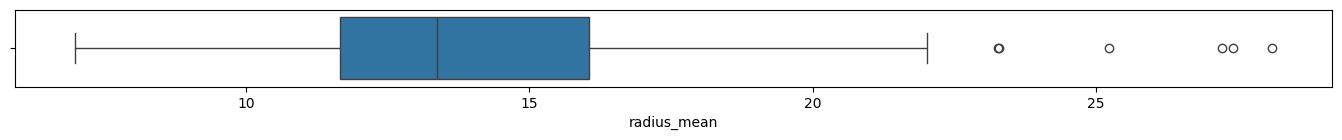

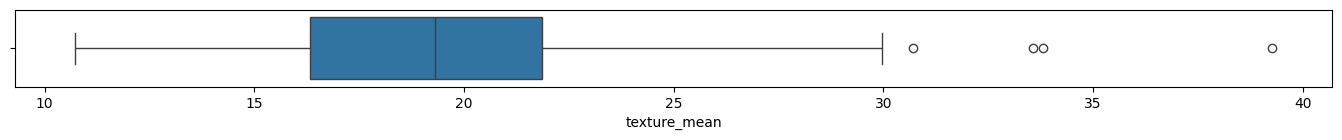

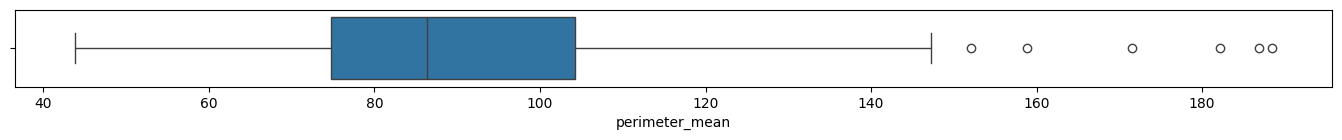

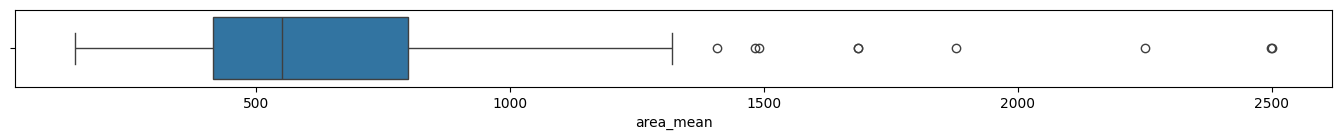

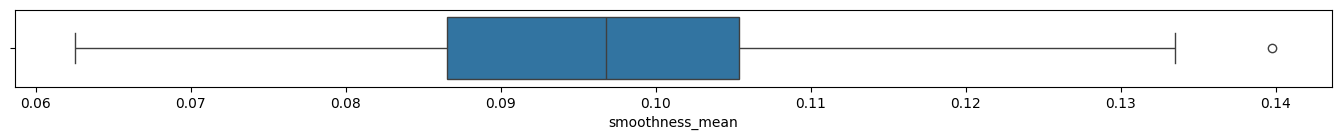

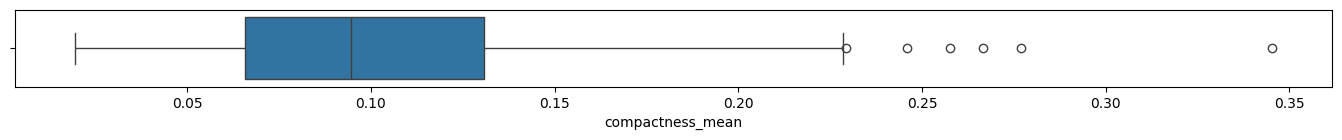

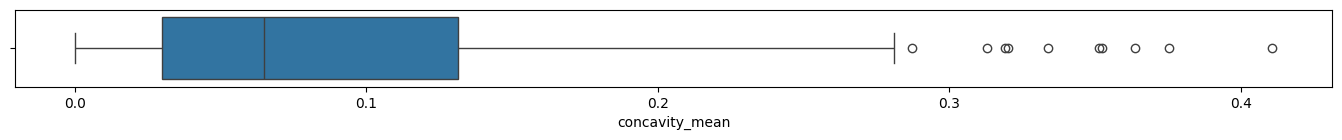

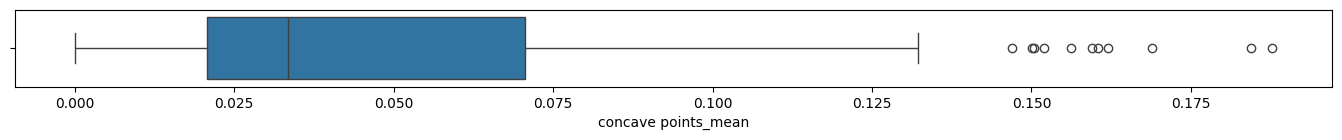

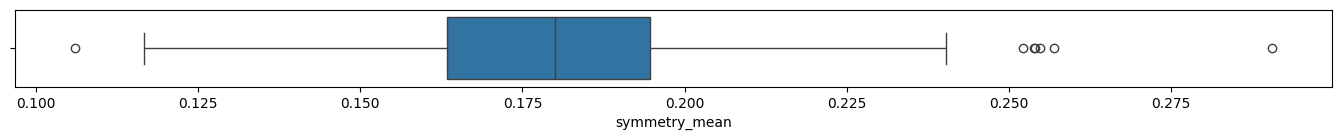

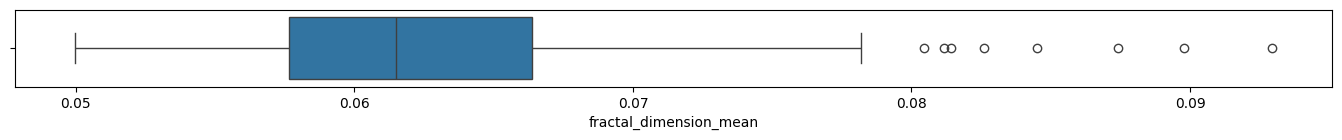

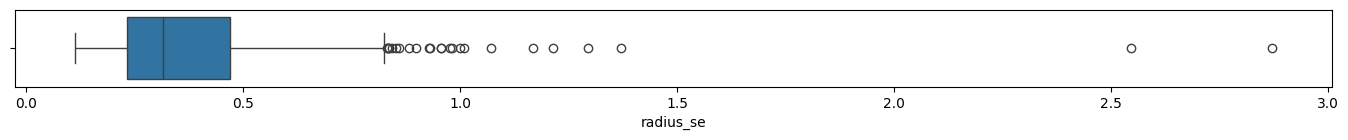

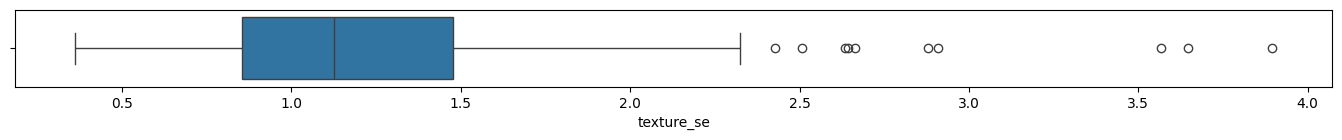

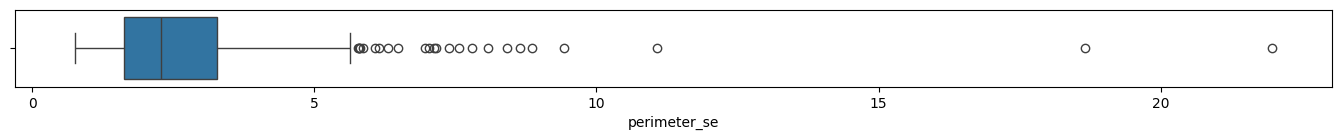

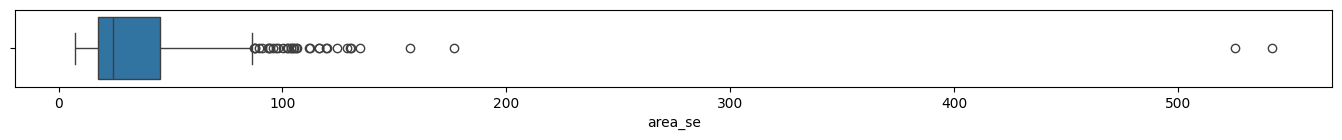

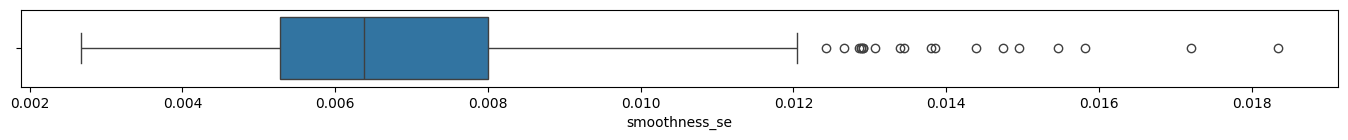

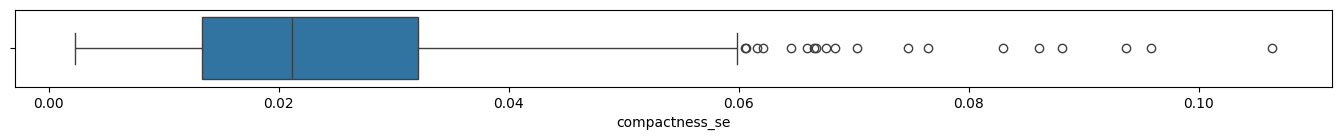

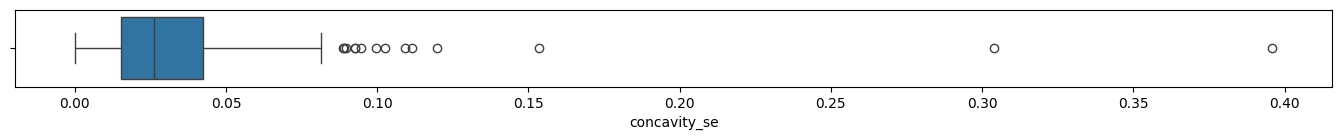

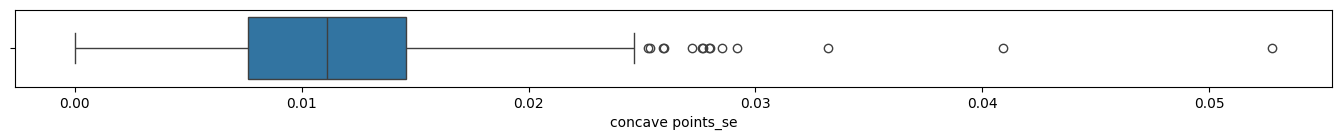

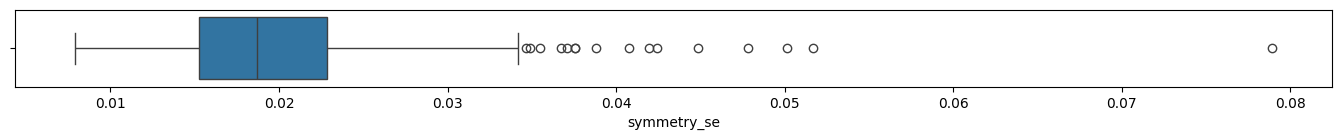

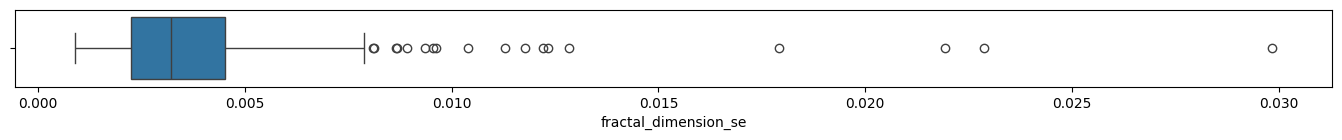

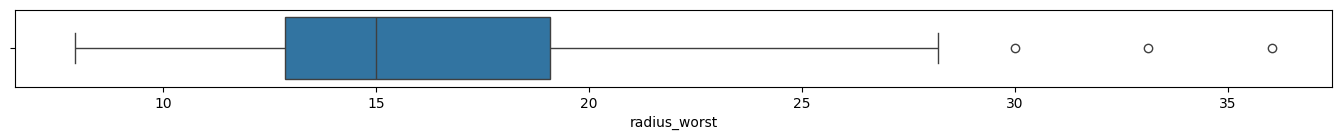

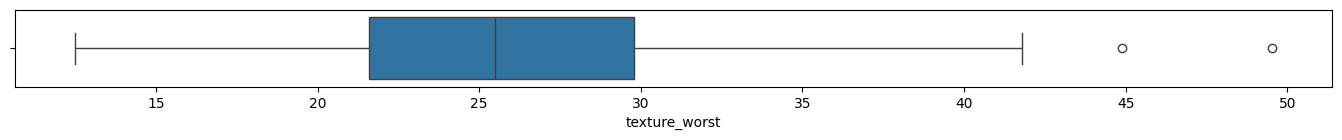

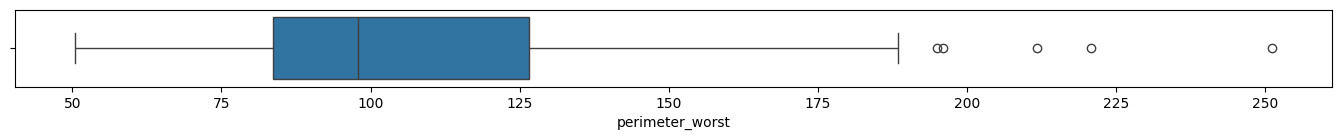

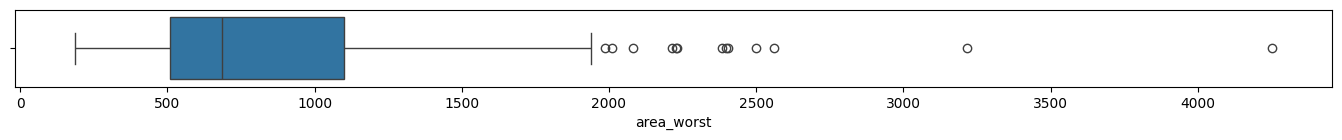

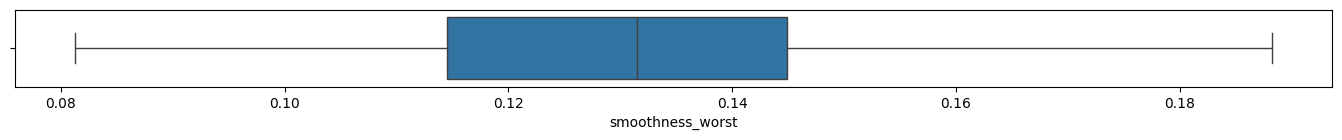

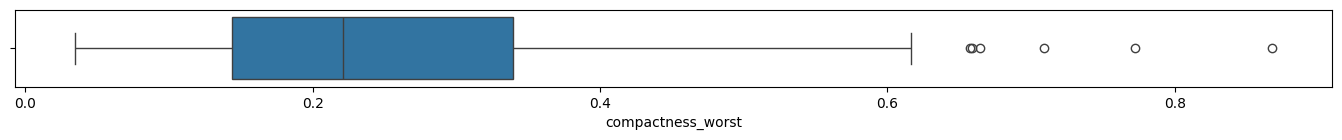

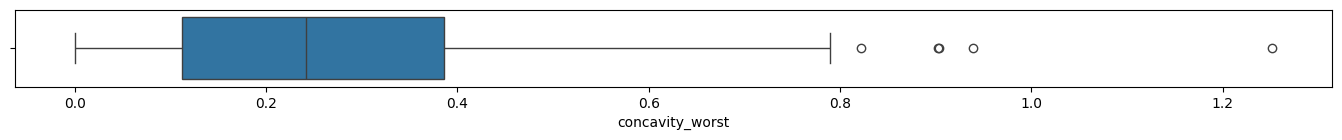

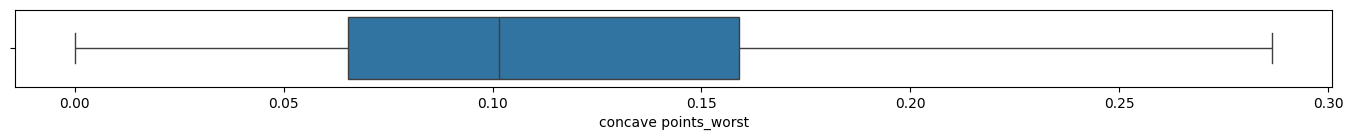

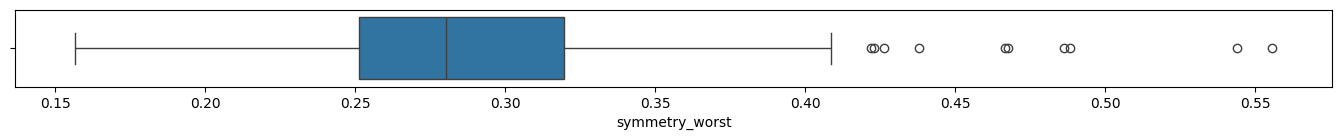

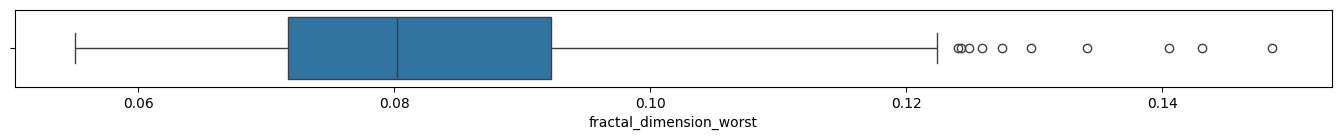

In [245]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in breast_cancer_train_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=breast_cancer_train_numeric, x=column)
        plt.show()
        plt.close()

### 1.4.3 Collinearity<a class="anchor" id="1.4.3"></a>

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis<a class="anchor" id="1.5.1"></a>

### 1.5.2 Hypothesis Testing<a class="anchor" id="1.5.2"></a>

## 1.6. Premodelling Data Preparation <a class="anchor" id="1.6"></a>

### 1.6.1 Preprocessed Data Description<a class="anchor" id="1.6.1"></a>

### 1.6.2 Preprocessing Pipeline Development<a class="anchor" id="1.6.2"></a>

## 1.7. Model Development and Validation <a class="anchor" id="1.7"></a>

### 1.7.1 Random Forest<a class="anchor" id="1.7.1"></a>

### 1.7.2 AdaBoost<a class="anchor" id="1.7.2"></a>

### 1.7.3 Gradient Boosting<a class="anchor" id="1.7.3"></a>

### 1.7.4 XGBoost<a class="anchor" id="1.7.4"></a>

### 1.7.5 Light GBM<a class="anchor" id="1.7.5"></a>

### 1.7.6 CatBoost<a class="anchor" id="1.7.6"></a>

## 1.8. Model Monitoring using the NannyML Framework <a class="anchor" id="1.8"></a>

### 1.8.1 Baseline Control<a class="anchor" id="1.8.1"></a>

### 1.8.2 Simulated Covariate Drift<a class="anchor" id="1.8.2"></a>

### 1.8.3 Simulated Prior Shift<a class="anchor" id="1.8.3"></a>

### 1.8.4 Simulated Concept Drift<a class="anchor" id="1.8.4"></a>

### 1.8.5 Simulated Missingness Spike<a class="anchor" id="1.8.5"></a>

### 1.8.6 Simulated Seasonal Pattern<a class="anchor" id="1.8.6"></a>

## 1.9. Consolidated Findings <a class="anchor" id="1.9"></a>

# 2. Summary <a class="anchor" id="Summary"></a>

# 3. References <a class="anchor" id="References"></a>

* **[Book]** [Reliable Machine Learning](https://www.oreilly.com/library/view/reliable-machine-learning/9781098106218/) by Cathy Chen, Niall Richard Murphy, Kranti Parisa, D. Sculley and Todd Underwood
* **[Book]** [Designing Machine Learning Systems](https://www.oreilly.com/library/view/designing-machine-learning/9781098107956/) by Chip Huyen
* **[Book]** [Machine Learning Design Patterns](https://www.oreilly.com/library/view/machine-learning-design/9781098115777/) by Valliappa Lakshmanan, Sara Robinson and Michael Munn
* **[Book]** [Machine Learning Engineering](https://www.mlebook.com/wiki/doku.php) by Andriy Burkov
* **[Book]** [Engineering MLOps](https://www.oreilly.com/library/view/engineering-mlops/9781800562882/) by Emmanuel Raj
* **[Book]** [Introducing MLOps](https://www.oreilly.com/library/view/introducing-mlops/9781492083283/) by Mark Treveil, Nicolas Omont, Clément Stenac, Kenji Lefevre, Du Phan, Joachim Zentici, Adrien Lavoillotte, Makoto Miyazaki and Lynn Heidmann
* **[Book]** [Practical MLOps](https://www.oreilly.com/library/view/practical-mlops/9781098103002/) by Noah Gift and Alfredo Deza
* **[Book]** [Data Science on AWS](https://www.oreilly.com/library/view/data-science-on/9781492079385/) by Chris Fregly and Antje Barth
* **[Book]** [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning) by Gautam Kunapuli
* **[Book]** [Applied Predictive Modeling](http://appliedpredictivemodeling.com/) by Max Kuhn and Kjell Johnson
* **[Book]** [An Introduction to Statistical Learning](https://www.statlearning.com/) by Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani
* **[Book]** [Ensemble Methods: Foundations and Algorithms](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Zhi-Hua Zhou
* **[Book]** [Effective XGBoost: Optimizing, Tuning, Understanding, and Deploying Classification Models (Treading on Python)](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Matt Harrison, Edward Krueger, Alex Rook, Ronald Legere and Bojan Tunguz
* **[Python Library API]** [nannyML](https://www.nannyml.com/) by NannyML Team
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Python Library API]** [sklearn.tree](https://scikit-learn.org/stable/modules/tree.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [xgboost](https://xgboost.readthedocs.io/en/stable/python/index.html) by XGBoost Team
* **[Python Library API]** [lightgbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) by LightGBM Team
* **[Python Library API]** [catboost](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) by CatBoost Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Article]** [Comprehensive Comparison of ML Model Monitoring Tools: Evidently AI, Alibi Detect, NannyML, WhyLabs, and Fiddler AI](https://medium.com/@tanish.kandivlikar1412/comprehensive-comparison-of-ml-model-monitoring-tools-evidently-ai-alibi-detect-nannyml-a016d7dd8219) by Tanish Kandivlikar (Medium)
* **[Article]** [Monitoring AI in Production: Introduction to NannyML](https://adnankarol.medium.com/monitoring-ai-in-production-75f1260260cb) by Adnan Karol (Medium)
* **[Article]** [Data Drift Explainability: Interpretable Shift Detection with NannyML](https://towardsdatascience.com/data-drift-explainability-interpretable-shift-detection-with-nannyml-83421319d05f/) by Marco Cerliani (Towards Data Science)
* **[Article]** [An End-to-End ML Model Monitoring Workflow with NannyML in Python](https://www.datacamp.com/tutorial/model-monitoring-with-nannyml-in-python) by Bex Tuychiyev (DataCamp)
* **[Article]** [Detecting Concept Drift: Impact on Machine Learning Performance](https://www.nannyml.com/blog/concept-drift) by Michal Oleszak (NannyML.Com)
* **[Article]** [Estimating Model Performance Without Labels](https://www.nannyml.com/blog/machine-learning-performance-estimation) by Jakub Białek (NannyML.Com)
* **[Article]** [Monitoring Workflow for Machine Learning Systems](https://www.nannyml.com/blog/machine-learning-monitoring-workflow) by Santiago Víquez (NannyML.Com)
* **[Article]** [Don’t Let Yourself Be Fooled by Data Drift](https://www.nannyml.com/blog/when-data-drift-does-not-affect-performance-machine-learning-models) by Santiago Víquez (NannyML.Com)
* **[Article]** [Understanding Data Drift: Impact on Machine Learning Model Performance](https://www.nannyml.com/blog/types-of-data-shift) by Jakub Białek (NannyML.Com)
* **[Article]** [NannyML’s Guide to Data Quality and Covariate Shift](https://www.nannyml.com/blog/guide-data-quality-covariate-shift) by Magdalena Kowalczuk (NannyML.Com)
* **[Article]** [From Reactive to Proactive: Shift your ML Monitoring Approach](https://www.nannyml.com/blog/proactive-ml-monitoring-workflow) by Qiamo (Luca) Zheng (NannyML.Com)
* **[Article]** [How to Detect Under-Performing Segments in ML Models](https://www.nannyml.com/blog/detecting-underpeforming--segments-in-ml-models) by Kavita Rana (NannyML.Com)
* **[Article]** [Building Custom Metrics for Predictive Maintenance](https://www.nannyml.com/blog/custom-metrics-predictive-maintenance) by Kavita Rana(NannyML.Com)
* **[Article]** [3 Custom Metrics for Your Forecasting Models](https://www.nannyml.com/blog/custom-metrics-for-demand-forecasting-models) by Kavita Rana (NannyML.Com)
* **[Article]** [There's Data Drift, But Does It Matter?](https://www.nannyml.com/blog/data-drift-does-it-matter) by Santiago Víquez (NannyML.Com)
* **[Article]** [Monitoring Custom Metrics without Ground Truth](https://www.nannyml.com/blog/monitoring-custom-metrics-without-ground-truth) by Kavita Rana (NannyML.Com)
* **[Article]** [Which Multivariate Drift Detection Method Is Right for You: Comparing DRE and DC](https://www.nannyml.com/blog/dre-vs-dc) by Miles Weberman (NannyML.Com)
* **[Article]** [Prevent Failure of Product Defect Detection Models: A Post-Deployment Guide](https://www.nannyml.com/blog/prevent-failure-of-product-defect-detection-models) by Kavita Rana (NannyML.Com)
* **[Article]** [Common Pitfalls in Monitoring Default Prediction Models and How to Fix Them](https://www.nannyml.com/blog/monitor-default-prediction-models) by Miles Weberman (NannyML.Com)
* **[Article]** [Why Relying on Training Data for ML Monitoring Can Trick You](https://www.nannyml.com/blog/choose-reference-dataset) by Kavita Rana (NannyML.Com)
* **[Article]** [Estimating Model Performance Without Labels](https://www.nannyml.com/blog/machine-learning-performance-estimation) by Jakub Białek (NannyML.Com)
* **[Article]** [Using Concept Drift as a Model Retraining Trigger](https://www.nannyml.com/blog/concept-drift-retraining-trigger) by Taliya Weinstein (NannyML.Com)
* **[Article]** [Retraining is Not All You Need](https://www.nannyml.com/blog/retraining-is-not-all-you-need) by Miles Weberman (NannyML.Com)
* **[Article]** [A Comprehensive Guide to Univariate Drift Detection Methods](https://www.nannyml.com/blog/comprehensive-guide-univariate-methods) by Kavita Rana (NannyML.Com)
* **[Article]** [Stress-free Monitoring of Predictive Maintenance Models](https://www.nannyml.com/blog/monitor-predictive-maintenance-models-stress-free) by Kavita Rana (NannyML.Com)
* **[Article]** [Effective ML Monitoring: A Hands-on Example](https://www.nannyml.com/blog/ml-monitoring-workflow-hands-on) by Miles Weberman (NannyML.Com)
* **[Article]** [Don’t Drift Away with Your Data: Monitoring Data Drift from Setup to Cloud](https://www.nannyml.com/blog/monitoring-data-drift) by Taliya Weinstein (NannyML.Com)
* **[Article]** [Comparing Multivariate Drift Detection Algorithms on Real-World Data](https://www.nannyml.com/blog/tutorial-multivariate-drift-comparison) by Kavita Rana (NannyML.Com)
* **[Article]** [Detect Data Drift Using Domain Classifier in Python](https://www.nannyml.com/blog/data-drift-domain-classifier) by Miles Weberman (NannyML.Com)
* **[Article]** [Guide: How to evaluate if NannyML is the right monitoring tool for you](https://www.nannyml.com/blog/evaluate-nannyml) by Santiago Víquez (NannyML.Com)
* **[Article]** [How To Monitor ML models with NannyML SageMaker Algorithms](https://www.nannyml.com/blog/how-to-monitor-ml-models-with-nannyml-sagemaker-algorithms) by Wiljan Cools (NannyML.Com)
* **[Article]** [Tutorial: Monitoring Missing and Unseen values with NannyML](https://www.nannyml.com/blog/monitoring-missing-values-tutorial) by Santiago Víquez (NannyML.Com)
* **[Article]** [Monitoring Machine Learning Models: A Fundamental Practice for Data Scientists and Machine Learning Engineers](https://medium.com/data-science/monitoring-machine-learning-models-a-tried-and-true-cure-for-a-data-scientists-insomnia-c45b0979a878) by Saurav Pawar (Medium)
* **[Article]** [Failure Is Not an Option: How to Prevent Your ML Model From Degradation](https://medium.com/nannyml/failure-is-not-an-option-how-to-prevent-your-ml-model-from-degradation-nannyml-4473898af34a) by Maciej Balawejder (Medium)
* **[Article]** [Managing Data Drift and Data Distribution Shifts in the MLOps Lifecycle for Machine Learning Models](https://abhishek-reddy.medium.com/detecting-and-managing-data-distribution-shifts-in-the-mlops-lifecycle-for-machine-learning-models-1ea33ce84c3c) by Abhishek Reddy (Medium)
* **[Article]** [“You Can’t Predict the Errors of Your Model”… Or Can You?](https://medium.com/data-science/you-cant-predict-the-errors-of-your-model-or-can-you-1a2e4a1f38a0) by Samuele Mazzanti (Medium)
* **[Article]** [Understanding Concept Drift: A Simple Guide](https://medium.com/data-science/understanding-concept-drift-a-simple-guide-b2cf4e09deae) by Vitor Cerqueira (Medium)
* **[Article]** [Detecting Covariate Shift: A Guide to the Multivariate Approach](https://medium.com/data-science/detecting-covariate-shift-a-guide-to-the-multivariate-approach-c099bd1891b9) by Michał Oleszak (Medium)
* **[Article]** [Data Drift vs. Concept Drift: Differences and How to Detect and Address Them](https://dataheroes.ai/blog/data-drift-vs-concept-drift/) by DataHeroes Team (DataHeroes.AI)
* **[Article]** [An Introduction to Machine Learning Engineering for Production /MLOps — Concept and Data Drifts](https://medium.com/data-science/an-introduction-to-machine-learning-engineering-for-production-part-1-2247bbca8a61) by Praatibh Surana (Medium)
* **[Article]** [Concept Drift and Model Decay in Machine Learning](https://medium.com/data-science/concept-drift-and-model-decay-in-machine-learning-a98a809ea8d4) by Ashok Chilakapati (Medium)
* **[Article]** [Data Drift: Types of Data Drift](https://medium.com/data-science/data-drift-part-1-types-of-data-drift-16b3eb175006) by Numal Jayawardena (Medium)
* **[Article]** [Monitoring Machine Learning models](https://medium.com/data-science/monitoring-machine-learning-models-62d5833c7ecc) by Jacques Verre (Medium)
* **[Article]** [Data drift: It Can Come At You From Anywhere](https://medium.com/data-science/data-drift-it-can-come-at-you-from-anywhere-b78eb186855) by Tirthajyoti Sarkar (Medium)
* **[Article]** [Drift in Machine Learning](https://medium.com/data-science/drift-in-machine-learning-e49df46803a) by Piotr (Peter) Mardziel (Medium)
* **[Article]** [Understanding Dataset Shift](https://medium.com/data-science/understanding-dataset-shift-f2a5a262a766) by Matthew Stewart (Medium)
* **[Article]** [Calculating Data Drift in Machine Learning using Python](https://medium.com/data-science/calculating-data-drift-in-machine-learning-53676ff5646b) by Vatsal (Medium)
* **[Article]** [91% of ML Models Degrade in Time](https://medium.com/data-science/91-of-ml-models-degrade-in-time-cfd467905615) by Santiago Víquez (Medium)
* **[Article]** [Model Drift in Machine Learning](https://medium.com/data-science/model-drift-in-machine-learning-8023e3d08217) by Kurtis Pykes (Medium)
* **[Article]** [Production Machine Learning Monitoring: Outliers, Drift, Explainers & Statistical Performance](https://medium.com/data-science/production-machine-learning-monitoring-outliers-drift-explainers-statistical-performance-d9b1d02ac158) by Alejandro Saucedo (Medium)
* **[Article]** [How to Detect Model Drift in MLOps Monitoring](https://medium.com/data-science/how-to-detect-model-drift-in-mlops-monitoring-7a039c22eaf9) by Amit Paka (Medium)
* **[Article]** [“My data drifted. What’s next?” How to handle ML model drift in production.](https://medium.com/data-science/my-data-drifted-whats-next-how-to-handle-ml-model-drift-in-production-78719ef007b1) by Elena Samuylova (Medium)
* **[Article]** [Machine Learning Model Drift](https://medium.com/data-science/machine-learning-model-drift-9cc43ad530d6) by Sophia Yang (Medium)
* **[Article]** [Estimating the Performance of an ML Model in the Absence of Ground Truth](https://medium.com/data-science/estimating-the-performance-of-an-ml-model-in-the-absence-of-ground-truth-cc87dbf6e57) by Eryk Lewinson (Medium)
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Stacking Machine Learning: Everything You Need to Know](https://www.machinelearningpro.org/stacking-machine-learning/) by Ada Parker (MachineLearningPro.Org)
* **[Article]** [Ensemble Learning: Bagging, Boosting and Stacking](https://duchesnay.github.io/pystatsml/machine_learning/ensemble_learning.html) by Edouard Duchesnay, Tommy Lofstedt and Feki Younes (Duchesnay.GitHub.IO)
* **[Article]** [Stack Machine Learning Models: Get Better Results](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/) by Casper Hansen (Developer.IBM.Com)
* **[Article]** [GradientBoosting vs AdaBoost vs XGBoost vs CatBoost vs LightGBM](https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/) by Geeks for Geeks Team (GeeksForGeeks.Org)
* **[Article]** [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [The Ultimate Guide to AdaBoost Algorithm | What is AdaBoost Algorithm?](https://www.mygreatlearning.com/blog/adaboost-algorithm/) by Ashish Kumar (MyGreatLearning.Com)
* **[Article]** [A Gentle Introduction to Ensemble Learning Algorithms](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Ensemble Methods: Elegant Techniques to Produce Improved Machine Learning Results](https://www.toptal.com/machine-learning/ensemble-methods-machine-learning) by Necati Demir (Toptal.Com)
* **[Article]** [The Essential Guide to Ensemble Learning](https://www.v7labs.com/blog/ensemble-learning-guide) by Rohit Kundu (V7Labs.Com)
* **[Article]** [Develop an Intuition for How Ensemble Learning Works](https://machinelearningmastery.com/how-ensemble-learning-works/) by by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Ensemble Learning: Bagging, Boosting, Stacking](https://ai.plainenglish.io/ml-tutorial-19-ensemble-learning-bagging-boosting-stacking-5a926db20ec5) by Ayşe Kübra Kuyucu (Medium)
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://medium.com/@senozanAleyna/ensemble-boosting-bagging-and-stacking-machine-learning-6a09c31breast_cancer778) by Aleyna Şenozan (Medium)
* **[Article]** [Boosting, Stacking, and Bagging for Ensemble Models for Time Series Analysis with Python](https://medium.com/@kylejones_47003/boosting-stacking-and-bagging-for-ensemble-models-for-time-series-analysis-with-python-d74ab9026782) by Kyle Jones (Medium)
* **[Article]** [Different types of Ensemble Techniques — Bagging, Boosting, Stacking, Voting, Blending](https://medium.com/@abhishekjainindore24/different-types-of-ensemble-techniques-bagging-boosting-stacking-voting-blending-b04355a03c93) by Abhishek Jain (Medium)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Understanding Ensemble Methods: Bagging, Boosting, and Stacking](https://divyabhagat.medium.com/understanding-ensemble-methods-bagging-boosting-and-stacking-7683c493ac19) by Divya bhagat (Medium)
* **[Video Tutorial]** [Concept Drift Detection with NannyML | Webinar](https://www.youtube.com/watch?v=kBTty6JTW9Q) by NannyML (YouTube)
* **[Video Tutorial]** [Fooled by Data Drift: How to Monitor ML Without False Positives](https://www.youtube.com/watch?v=71vlPelFVs0) by NannyML (YouTube)
* **[Video Tutorial]** [Monitoring Custom Metrics Without Access to Targets](https://www.youtube.com/watch?v=tqPoaA0STHs) by NannyML (YouTube)
* **[Video Tutorial]** [Analyzing Your Model's Performance in Production](https://www.youtube.com/watch?v=qDufIIduw5M) by NannyML (YouTube)
* **[Video Tutorial]** [How to Monitor Predictive Maintenance Models | Webinar Replay](https://www.youtube.com/watch?v=VuEYjEKUkWA) by NannyML (YouTube)
* **[Video Tutorial]** [Machine Learning Monitoring Workflow [Webinar]](https://www.youtube.com/watch?v=aXyc9TSl_u8) by NannyML (YouTube)
* **[Video Tutorial]** [Monitoring Machine Learning Models on AWS | Webinar](https://www.youtube.com/watch?v=82NAJG8m5r0) by NannyML (YouTube)
* **[Video Tutorial]** [Root Cause Analysis for ML Model Failure](https://www.youtube.com/watch?v=f-15Ri8MFAM) by NannyML (YouTube)
* **[Video Tutorial]** [Quantifying the Impact of Data Drift on Machine Learning Model Performance | Webinar](https://www.youtube.com/watch?v=pZJQCxt0aus) by NannyML (YouTube)
* **[Video Tutorial]** [How to Detect Drift and Resolve Issues in Your Machine Learning Models?](https://www.youtube.com/watch?v=zkWDb2URdIQ) by NannyML (YouTube)
* **[Video Tutorial]** [Notebooks to Containers: Setting up Continuous (ML) Model Monitoring in Production](https://www.youtube.com/watch?v=00MJ-gvpRkI) by NannyML (YouTube)
* **[Video Tutorial]** [Performance Estimation using NannyML | Tutorial in Jupyter Notebook](https://www.youtube.com/watch?v=fo0ejdQFcT0) by NannyML (YouTube)
* **[Video Tutorial]** [What Is NannyML? Introducing Our Open Source Python Library](https://www.youtube.com/watch?v=HgZm2JdE5Fo) by NannyML (YouTube)
* **[Video Tutorial]** [How to Automatically Retrain Your Models with Concept Drift Detection?](https://www.youtube.com/watch?v=QoymE--4sPM) by NannyML (YouTube)
* **[Video Tutorial]** [How to Use NannyML? Two Modes of Running Our Library](https://www.youtube.com/watch?v=ATKJXo6lTls) by NannyML (YouTube)
* **[Video Tutorial]** [How to Integrate NannyML in Production? | Tutorial](https://www.youtube.com/watch?v=zdiM2ZFD__w) by NannyML (YouTube)
* **[Video Tutorial]** [Bringing Your Machine Learning Model to Production | Overview](https://www.youtube.com/watch?v=XH_4X6oo8hI) by NannyML (YouTube)
* **[Video Tutorial]** [Notebooks to Containers: Setting Up Continuous (ML) Model Monitoring in Production](https://www.youtube.com/watch?v=00MJ-gvpRkI) by NannyML (YouTube)
* **[Video Tutorial]** [ML Performance without Labels: Comparing Performance Estimation Methods (Webinar Replay)](https://www.youtube.com/watch?v=CKCSC9Srgnc) by NannyML (YouTube)
* **[Course]** [DataCamp Python Data Analyst Certificate](https://app.datacamp.com/learn/career-tracks/data-analyst-with-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Associate Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/associate-data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Engineer Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-engineer) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Scientist Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-scientist-with-python) by DataCamp Team (DataCamp)
* **[Course]** [IBM Data Analyst Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-analyst) by IBM Team (Coursera)
* **[Course]** [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science) by IBM Team (Coursera)
* **[Course]** [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) by IBM Team (Coursera)